Reem Emad, sec.:1, B.N.:33

Osama Magdy, sec.:1 B.N.:14

# **`Data Cleaning Practice`**

#### Data cleaning is a cruicial process in any Data Science project. There's no one typical way on carrying out this cleaning, however, some basic steps are commonly followed. 
#### Let's have a quick look on such steps carried out on the "Netflix-titles" dataset from Kaggle.


#### **Agenda**


1.   Investigate and understand data variables
2.   Check for data missingness (more on that in section-2)
3.   Check the data type of each column
4.   Clean string data columns
5.   Deal with the Nan values
6.   Extract more info from the dataset
7.   Analyse unique values of some columns
8.   MCAR, MAR, MNAR and data imputations














#### **Step-1**: **Investigate the data for potential problems**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
netflix_titles = pd.read_csv("netflix_titles.csv")

# printing the first 5 rows of dataset
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### *Through our first look, we could observe some potential issues as:-*


1.   Nan values in director, cast, country columns
2.   Multiple comma-separated words in cast, listed_in columns
3.   Words & numbers together in data_added, duration columns
4.   Release year, rating, listed_in potenially have missing values



In [2]:
##### Keep the data columns in a list for easier access
columns = list(netflix_titles.columns)
columns

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

#### **Step-2: Investigate the proportion of missing data**

In [3]:
print("Missing values distribution: ")
print(netflix_titles.isnull().mean())
print("")

Missing values distribution: 
show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64



#### From the above we can observe:-


1.   director column has the highst ratio of missing data ~ 30%
2.   cast and country have considerable ratio ~ 9%
3.   data_added, rating and duration have very low amount of missing data

How to deal with those missing data?


*   Drop the column completely, if not very important
*   Impute the missing data (replace with mean, median, mode, Knn ...etc.) *More on that later*


**Step-3: Check the data type of each column**

In [4]:
print("Column datatypes: ")
print(netflix_titles.dtypes)

Column datatypes: 
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


*In pandas, **object** means either string or mixed type (numerical and non-numerical type mixed).*

**Step-4: Strip trailing white-spaces from string columns**

In [5]:
str_cols = columns
str_cols.remove('release_year')

# removing leading and trailing characters from columns with str type
for i in str_cols:
    netflix_titles[i] = netflix_titles[i].str.strip()


**Step-5: Deal with Nan values**
##### Generally, a Nan value is annoying to deal with programatically, we always prefer to substitute it with something else.

##### For object type, replace the Nan with an empty string "" or "None" word



In [6]:
columns = ['director', 'cast', 'country', 'rating', 'date_added']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    netflix_titles[column] = netflix_titles[column].fillna("")


**Step-6: Extract more info from the dataset**
##### *Looking at the mixed-data columns*
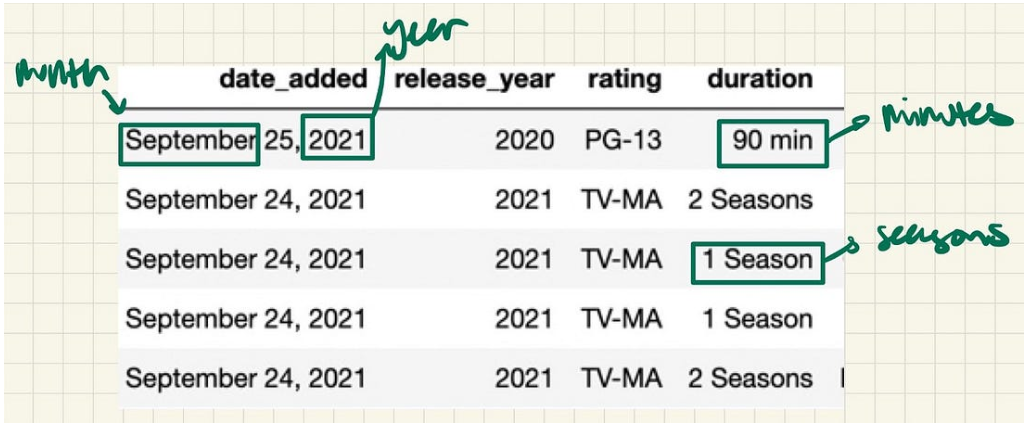

##### We find date_added column with month, day and year info all combined together. Separating them makes it much easier to discover interesting trends or patterns, rather than keeping the granuality as the whole date. Same applies on duration column where we can not differentiate between different durations units. Is there another issue comparing duration in minutes with that in seasons?

#### **Add month and year columns to express the date**
#### **Replace Nan values for integers with 0**

In [7]:
from datetime import datetime
# examining rows with null values for date_added column
rows = []
for i in range(len(netflix_titles)):
    if netflix_titles['date_added'].iloc[i] == "":
        rows.append(i)
    
# examine those rows to confirm null state
netflix_titles.loc[rows, :]
# extracting months added and years added
month_added = []
year_added = []
for i in range(len(netflix_titles)):
    # replacing NaN values with 0
    if i in rows:
        month_added.append(0)
        year_added.append(0)
    else:
        date = netflix_titles['date_added'].iloc[i].split(" ")
        month_added.append(date[0])
        year_added.append(int(date[2]))
        
# turning month names into month numbers
for i, month in enumerate(month_added):
    if month != 0:
        datetime_obj = datetime.strptime(month, "%B")
        month_number = datetime_obj.month
        month_added[i] = month_number
        
# checking all months
#print(set(month_added))
#print(set(year_added))

# inserting the month and year columns into the dataset
netflix_titles.insert(7, "month_added", month_added, allow_duplicates = True)
netflix_titles.insert(8, "year_added", year_added, allow_duplicates = True)
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",9,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",9,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",9,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",9,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",9,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


*One solution to deal with the double-duration issue (minutes vs season) is to separate the dataset into two different ones, one for each type, and we can merge them again when we are done with cleaning. Duration column now will be numerical type having only one unit*

In [8]:
shows = []
films = []

# looping through the dataset to identify rows that are TV shows and films
for i in range(len(netflix_titles)):
    if netflix_titles['type'].iloc[i] == "TV Show":
        shows.append(i)
    else:
        films.append(i)
 
# grouping rows that are TV shows
netflix_shows = netflix_titles.loc[shows, :]

#grouping rows that are films
netflix_films = netflix_titles.loc[films, :]

# reseting the index of the new datasets
netflix_shows = netflix_shows.set_index([pd.Index(range(0, len(netflix_shows)))]) 
netflix_films = netflix_films.set_index([pd.Index(range(0, len(netflix_films)))])


#### **Extract the numerical info from the duration column to feed each of the new datasets**
#### **Replace Nan values with 0**


In [9]:
def getDuration(data):
    # count = 0
    durations = []
    for value in data:
	# filling in missing values
        if type(value) is float:
            durations.append(0)
        else:
            values = value.split(" ")
            durations.append(int(values[0]))
    return durations
    
# inserting new duration type column for shows (renamed column)
netflix_shows.insert(11, 'seasons', getDuration(netflix_shows['duration']))
netflix_shows = netflix_shows.drop(['duration'], axis = 1)
netflix_shows.head()

# inserting new duration type column for films (renamed column)
netflix_films.insert(11, 'length', getDuration(netflix_films['duration']))
netflix_films = netflix_films.drop(['duration'], axis = 1)
# netflix_films.head() # Now type is movie only with lenth column (no duration and seasons)

**Step-7: Analyse unique values of some columns**
##### Other than the potentially missing values in some columns, potentially corrupted ones are worth taken into consideration. For this sake, we'll check for the unique values of some columns; those with finite set of unique values and the ones we think might contain corrupted ones.

##### rating, country and listed_in are our potential columns

In [10]:
# getting the unique ratings for films
print("Unique ratings for films ", netflix_films['rating'].unique())

print("------------------------------------------------------------------------------------------------")
# getting the unique ratings for shows
print("Unique ratings for shows ", netflix_shows['rating'].unique())

Unique ratings for films  ['PG-13' 'PG' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' '' 'TV-Y7-FV' 'UR']
------------------------------------------------------------------------------------------------
Unique ratings for shows  ['TV-MA' 'TV-14' 'TV-Y7' 'TV-PG' 'TV-Y' 'TV-G' 'R' 'NR' '' 'TV-Y7-FV']


##### Here we find erroneuos duration values in the rating column, probably caused by invalid comma separations of the original csv file. Besides, UR (unrated) and NR (not rated) are 2 synonymous values

##### Let's examine the entire rows of these erroneous values

In [11]:
incorrect_ratings = ['74 min', '84 min', '66 min']
for i in range(len(netflix_films)):
    if netflix_films['rating'].iloc[i] in incorrect_ratings:
        print(netflix_films.iloc[i])
        print("")

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
month_added                                                     4
year_added                                                   2017
release_year                                                 2017
rating                                                     74 min
length                                                          0
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 3562, dtype: object

show_id                                          

##### We'll fix the issue by placing these faulty values in the length column instead, and fill the empty rating column with the NR value

In [12]:
index = [3562, 3738, 3747]

# fixing the entries
for i in index:
    split_value = netflix_films['rating'].iloc[i].split(" ")
    length = split_value[0]
    netflix_films['length'].iloc[i] = length # it was netflix_films['duration'].iloc[i] = length, we don't have duration coulmn anymore
    netflix_films['rating'].iloc[i] = "NR"
    
# double checking the entries again
for i in index:
    print(netflix_films.iloc[i])

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
month_added                                                     4
year_added                                                   2017
release_year                                                 2017
rating                                                         NR
length                                                         74
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
Name: 3562, dtype: object
show_id                                           

<ipython-input-12-3e5080e52faa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_films['length'].iloc[i] = length # it was netflix_films['duration'].iloc[i] = length, we don't have duration coulmn anymore
<ipython-input-12-3e5080e52faa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_films['rating'].iloc[i] = "NR"


*Keeping the consistency between the 2 datasets, we'll unify the NR value in netflix_films following the shows.*

In [13]:
# fixing the entries
for i in range(len(netflix_films)):
    if netflix_films['rating'].iloc[i] == "UR":
        netflix_films['rating'].iloc[i] = "NR"
        
# double checking
netflix_films['rating'].unique()

<ipython-input-13-e678d0eb6d67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_films['rating'].iloc[i] = "NR"


array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', 'NR', '', 'TV-Y7-FV'], dtype=object)

##### Following the same process we did for rating column with listed_in and country ones, we'll no longer use the python built-in unique(), as these values are comma-separated words. We need to implement our getUnique instead.

In [14]:
def getUnique(data):
    unique_values = set()
    for value in data:
        if type(value) is float:
            unique_values.add(None)
        else:
            values = value.split(", ")
            for i in values:
                unique_values.add(i)
    return list(unique_values)

##### Let's apply it on the country column

In [15]:
unique_countries = getUnique(netflix_titles['country'])
unique_countries

['',
 'Italy',
 'Slovakia',
 'Cuba',
 'Ireland',
 'Panama',
 'Russia',
 'Ukraine',
 'Qatar',
 'Liechtenstein',
 'Georgia',
 'Peru',
 'South Africa',
 'Saudi Arabia',
 'Ecuador',
 'Hong Kong',
 'Mexico',
 'United States',
 'Burkina Faso',
 'Kazakhstan',
 'Venezuela',
 'Somalia',
 'Iceland',
 'Hungary',
 'Sri Lanka',
 'China',
 'East Germany',
 'Botswana',
 'Germany',
 'Romania',
 'Syria',
 'Indonesia',
 'United Arab Emirates',
 'Norway',
 'Netherlands',
 'Uruguay',
 'Jamaica',
 'Belgium',
 'Nicaragua',
 'South Korea',
 'Bahamas',
 'Malta',
 'United Kingdom,',
 'Singapore',
 'Malaysia',
 'Poland',
 'Angola',
 'Iran',
 'Czech Republic',
 'Mauritius',
 'Kuwait',
 'Cambodia',
 'Denmark',
 'Bermuda',
 'Thailand',
 'Finland',
 'Pakistan',
 'Lithuania',
 'Malawi',
 'Senegal',
 'Armenia',
 'Bangladesh',
 'Austria',
 'Israel',
 'Greece',
 'Spain',
 'Uganda',
 'Albania',
 'Poland,',
 'Bulgaria',
 'Brazil',
 'Soviet Union',
 'Serbia',
 'Mongolia',
 'Vatican City',
 'Nigeria',
 'Luxembourg',
 'Samo

*A couple of potential problems are found here with the aid of some Googling, there are entries of Germany, alongside with east/west Germany. Also, Russia is addressed as Soviet union. We'll need to unify things, as follows.*

In [16]:
# converting soviet union to russia and east/west germany to germany
for i in range(len(netflix_titles)):
    if type(netflix_titles['country'].iloc[i]) is not float:
        countries = netflix_titles['country'].iloc[i].split(", ")
        for j in range(len(countries)):
            if "Germany" in countries[j]:
                countries[j] = "Germany"
            elif "Soviet Union" in countries[j]:
                countries[j] = "Russia"
        netflix_titles['country'].iloc[i] = ", ".join(countries)

<ipython-input-16-4b7bd33d62d2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_titles['country'].iloc[i] = ", ".join(countries)


In [17]:
unique_genres_films = getUnique(netflix_shows['listed_in'])
unique_genres_films


['TV Dramas',
 'International TV Shows',
 'TV Action & Adventure',
 'Romantic TV Shows',
 'Teen TV Shows',
 'Reality TV',
 'British TV Shows',
 'Classic & Cult TV',
 'Science & Nature TV',
 'TV Comedies',
 'TV Thrillers',
 'Korean TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'Spanish-Language TV Shows',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 "Kids' TV",
 'Anime Series',
 'Crime TV Shows',
 'TV Horror',
 'TV Mysteries',
 'Docuseries']

Analysing the unique genres of both of datasets, we find recurring TV-show and Movie genres. Are they just a label to each type? We can check by counting them. If their count is the same as each dataset size, then yes!

In [18]:
count = 0
index, index2 = [], []
for i, value in enumerate(netflix_shows['listed_in']):
    genres = value.split(", ")
    if "TV Shows" in genres:
        count += 1
        index.append(i)
print("count %s" %count)
print("index %s" %index)

for i, value in enumerate(netflix_films['listed_in']):
    genres = value.split(", ")
    if "Movies" in genres:
        count += 1
        index2.append(i)
print("count %s" %count)
print("index %s" %index)

count 16
index [59, 110, 272, 286, 452, 599, 991, 1432, 1548, 1808, 1840, 2107, 2160, 2190, 2465, 2559]
count 73
index [59, 110, 272, 286, 452, 599, 991, 1432, 1548, 1808, 1840, 2107, 2160, 2190, 2465, 2559]


*Let's examine the first 5 rows in those sets containing TV-shows and Movies as genres*

In [19]:
(netflix_shows.iloc[index[0:5]])

,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,seasons,listed_in,description
59,s149,TV Show,HQ Barbers,Gerhard Mostert,"Hakeem Kae-Kazim, Chioma Omeruah, Orukotan Ade...",,"September 1, 2021",9,2021,2020,TV-14,1,TV Shows,When a family run barber shop in the heart of ...
110,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",8,2021,2021,TV-MA,1,TV Shows,"From amusement to awe, the nine human emotions..."
272,s727,TV Show,Metallica: Some Kind of Monster,"Joe Berlinger, Bruce Sinofsky","James Hetfield, Lars Ulrich, Kirk Hammett, Rob...",United States,"June 13, 2021",6,2021,2014,TV-MA,1,TV Shows,This collection includes the acclaimed rock do...
286,s772,TV Show,Pretty Guardian Sailor Moon Eternal The Movie,Chiaki Kon,"Kotono Mitsuishi, Hisako Kanemoto, Rina Satou,...",,"June 3, 2021",6,2021,2021,TV-14,1,TV Shows,When a dark power enshrouds the Earth after a ...
452,s1332,TV Show,Five Came Back: The Reference Films,,,United States,"February 9, 2021",2,2021,1945,TV-MA,1,TV Shows,This collection includes 12 World War II-era p...


In [20]:
(netflix_films.iloc[index2[0:5]])

,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,length,listed_in,description
197,s309,Movie,American Masters: Inventing David Geffen,Susan Lacy,David Geffen,United States,"August 4, 2021",8,2021,2012,TV-MA,115,Movies,"The son of Jewish immigrants, David Geffen eme..."
310,s471,Movie,Bridgerton - The Afterparty,,"David Spade, London Hughes, Fortune Feimster",,"July 13, 2021",7,2021,2021,TV-14,39,Movies,"""Bridgerton"" cast members share behind-the-sce..."
456,s730,Movie,Bling Empire - The Afterparty,,"David Spade, London Hughes, Fortune Feimster",,"June 12, 2021",6,2021,2021,TV-MA,36,Movies,"The stars of ""Bling Empire"" discuss the show's..."
457,s731,Movie,Cobra Kai - The Afterparty,,"David Spade, London Hughes, Fortune Feimster",,"June 12, 2021",6,2021,2021,TV-MA,34,Movies,"Ralph Macchio, William Zabka and more from the..."
458,s733,Movie,To All the Boys: Always and Forever - The Afte...,,"Cast members of the ""To All the Boys"" films di...",,"June 12, 2021",6,2021,2021,TV-MA,36,Movies,"Cast members of the ""To All the Boys"" films di..."


*This result indicates that these genres were added to those entries that had no genre originally. We can replace them with None or empty string as we did with missing string values.*

# Data Missingness: MCAR, MAR, MNAR
##### One of the most important issues in any dataset we deal with is the missing data which, if ignored, can lead to misleading results.

##### Here are the main 3 types of data missingness and how to deal with each:-


1.   MCAR: no pattern can be observed in the data missingness, probability of missingness in one independent variable does not depend on any other observed independent variables; it depends only on some external factors 
2.   MAR: again some pattern can be observed, but probability of missingness depends on (or can be explained by) some other idependent wariable
3.   MNAR: there's some observed pattern in the missingness of data, but can't be explained through any of the data variables

#### Summary

##### Pattern  /   Data Explains Pattern

            Yes         No

    Yes     MAR        MNAR
    No      --         MCAR



**MCAR: example**
##### Create a random dataset of arbitrary number of rows

In [21]:
import numpy as np
import pandas as pd
N = 3000
gender = np.random.choice(["Male", "Female"], N, p=[0.6, 0.4])
height = 140 + (200-140) * np.random.rand(N)
weight = 40 + (120-40) * np.random.rand(N)
salary = 30000+(80000-30000) * np.random.rand(N)
df = pd.DataFrame(data=[gender, height, weight, salary]).transpose()
df.columns = ["Gender", "Height", "weight", "salary"]

##### Impose MCAR using an external factor probability of a randomly thrown dice

In [22]:
df["Dice"] = df["Gender"] # Gender column is used as an explonatory column
# Fill the Dice column with the probability values
df["Dice"] = np.random.choice([1, 2, 3, 4, 5, 6], N, p=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
# Dtermine indices where Dice=6
index = df[df["Dice"]==6].index
# Replace with NaN
df.loc[index,"Height"] = np.nan

Detect the MCAR using statistical test (χ2 test)

##### Check the p-value associated with the χ2 test with each of the independent variables. p-value < 0.05 indicates dependency

##### Let's start with the gender column. We'll need to fill this contingency table first

            |   True   |   False  |
    Female   |   n1    |   n3   |
    Male     |   n2    |   n4   |

In [23]:
# Initialize the Dice columns
df["Height_missing"] = df["Height"]
# The column is false
df["Height_missing"] = False
# Replace where Height_missing with True where Height is missing
df.loc[df[df['Height'].isnull()].index, "Height_missing"] = True


In [24]:
print("Missing height values")

n1 = df[df["Height_missing"]==True].groupby("Gender")["Height_missing"].count()[0]
n2 = df[df["Height_missing"]==True].groupby("Gender")["Height_missing"].count()[1]

df[df["Height_missing"]==True].groupby("Gender")["Height_missing"].count()

Missing height values


Gender
Female    219
Male      297
Name: Height_missing, dtype: int64

In [25]:
print("Present height values")

n3 = df[df["Height_missing"]==False].groupby("Gender")["Height_missing"].count()[0]
n4 = df[df["Height_missing"]==False].groupby("Gender")["Height_missing"].count()[1]

df[df["Height_missing"]==False].groupby("Gender")["Height_missing"].count()

Present height values


Gender
Female     969
Male      1515
Name: Height_missing, dtype: int64

##### Check the P-value associated with the given data

In [26]:
from scipy.stats import chi2_contingency

table = [[n1, n3], [n2, n4]]

chi2, p, dof, ex = chi2_contingency(table)

print("The p-value is equal to {}".format(p))

The p-value is equal to 0.16117384711151939


##### This p-value is much higher than the threshold (0.05) indicating that the missingness in the height column does not depend on the gender one. We shall repeat the same analysis with the other columns in a similar way

# Requirements

1.   Using the dataset we just created, impose an MAR on the weight column. Which column will you use as an explanatory one?
2.   Follow on 1, detect the type of missingness to verify 1, then impute the missing values using mean, mode, median, and Knn imputations. Compare between these 4 in terms of mean and variance. What do you notice?
3.   Impose an MNAR on the salary column. Try to detect its kind. Does it have any statistical test to detect?
4.   Follow on 3, impute the missingness with 2 different methods, then show the Boxplot of each. Briefly explain your findings.

**Adopted From**

1.   https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d
2.   https://www.kaggle.com/code/yassirarezki/handling-missing-data-mcar-mar-and-mnar-part-i/notebook



Reem Emad, sec.:1, B.N.:33

Osama Magdy, sec.:1 B.N.:14

1] For MAR, We can have a relation between the height and the weight (dependent features)

So we'll use the "Height" column as an explanatory one

In [51]:
N = 3000
gender = np.random.choice(["Male", "Female"], N, p=[0.6, 0.4])
height = 140 + (200-140) * np.random.rand(N)
weight = 40 + (120-40) * np.random.rand(N)
salary = 30000+(80000-30000) * np.random.rand(N)
df = pd.DataFrame(data=[gender, height, weight, salary]).transpose()
df.columns = ["Gender", "Height", "weight", "salary"]
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [28]:
# Impose MAR on the weight column df["weight"] 

def replace_weight_nan():
  # Dtermine indices where Height > 170, they don't prefer to give their weight
  index = df[df["Height"]>170].sample(frac=0.8).index

  # Replace with NaN
  df.loc[index,"weight"] = np.nan


In [29]:
replace_weight_nan()

df["weight_missing"] = df["weight"]
# The column is false
df["weight_missing"] = False
# Replace where weight_missing with True where weight is missing
df.loc[df[df['weight'].isnull()].index, "weight_missing"] = True

In [30]:
# all values count in weight column
df["weight_missing"].value_counts()

False    1811
True     1189
Name: weight_missing, dtype: int64

In [31]:
# make column height_weight_corr to check if the weight is missing because of the height
df["height_weight_corr_miss"] = df["weight_missing"]
# The column is false
df["height_weight_corr_miss"] = False

# Assume I have observed that the weight is missing because of the height bigger than 180
index = df[df["Height"]>180].index

# Replace with NaN
df.loc[index,"height_weight_corr_miss"] = True

In [32]:
print("Missing weight values")

n1 = df[df["weight_missing"]==True].groupby("height_weight_corr_miss")["weight_missing"].count()[0]
n2 = df[df["weight_missing"]==True].groupby("height_weight_corr_miss")["weight_missing"].count()[1]

df[df["weight_missing"]==True].groupby("height_weight_corr_miss")["weight_missing"].count()

Missing weight values


height_weight_corr_miss
False    357
True     832
Name: weight_missing, dtype: int64

In [33]:
print("Present weight values")

n3 = df[df["weight_missing"]==False].groupby("height_weight_corr_miss")["weight_missing"].count()[0] 
n4 = df[df["weight_missing"]==False].groupby("height_weight_corr_miss")["weight_missing"].count()[1]

df[df["weight_missing"]==False].groupby("height_weight_corr_miss")["weight_missing"].count()

Present weight values


height_weight_corr_miss
False    1614
True      197
Name: weight_missing, dtype: int64

Detect the type of missingness to verify it's MAR

In [34]:
from scipy.stats import chi2_contingency

table = [[n1, n3], [n2, n4]]

chi2, p, dof, ex = chi2_contingency(table)

print("The p-value is equal to {}".format(p))

The p-value is equal to 2.5174588989387666e-243


Since p-value is very small approaches 0 and it's less than the threshold (0.05) then this shows that weight column **depends** on Height column then it's MAR

2] Impute the missing values using mean, mode, median, and Knn imputations. Compare between these 4 in terms of mean and variance. What do you notice?

In [35]:
# Impute the missing values with the mode of the column
replace_weight_nan()

print("Mean before imputing missing values with mode",df["weight"].mean())
print("Var before imputing missing values with mode",df["weight"].var())

print("mode: ",df["weight"].mode()[0])

df["weight"] = df["weight"].fillna(df["weight"].mode()[0])
mode_mean = df["weight"].mean()
mode_var = df["weight"].var()
print("Mean after imputing missing values with mode",df["weight"].mean()) 
print("Var after imputing missing values with mode",df["weight"].var()) 

Mean before imputing missing values with mode 80.27350936540084
Var before imputing missing values with mode 534.1329273351034
mode:  40.017704275434866
Mean after imputing missing values with mode 60.96414152391385
Var after imputing missing values with mode 682.4390637016602


In [53]:
# Impute the missing values with the mean of the column
replace_weight_nan()

print("Mean before imputing missing values with mean",df["weight"].mean())
print("Var before imputing missing values with mean",df["weight"].var())

df["weight"] = df["weight"].fillna(df["weight"].mean()) 

mean_mean = df["weight"].mean()
mean_var = df["weight"].var()

print("Mean after imputing missing values with mean",df["weight"].mean()) # Mean is not changed
print("Var after imputing missing values with mean",df["weight"].var()) 
# Varience is changed as we put the mean for all missing values so the varience between values is smaller, this is not a good imputation
# It reduces the variance of the variable, I need to preserve the varience of the column as much as possible


Mean before imputing missing values with mean 79.34117065413237
Var before imputing missing values with mean 458.24903537847206
Mean after imputing missing values with mean 79.34117065413237
Var after imputing missing values with mean 272.2906905783385


In [56]:
# Impute the missing values with the median of the column
replace_weight_nan()

print("Mean before imputing missing values with median",df["weight"].mean())
print("Var before imputing missing values with median",df["weight"].var())

df["weight"] = df["weight"].fillna(df["weight"].median()) 
print("median: ",df["weight"].median())
median_mean = df["weight"].mean()
median_var = df["weight"].var()
print("Mean after imputing missing values with median",df["weight"].mean())  
# this makes the mean very similar(almost identical) from the original mean before imputation
print("Var after imputing missing values with median",df["weight"].var()) 
# same problem as mean, varience is smaller than the original one

Mean before imputing missing values with median 79.27879860678974
Var before imputing missing values with median 438.531255417205
median:  79.34117065413237
Mean after imputing missing values with median 79.30410086732842
Var after imputing missing values with median 260.57536212126405


In [38]:
# Impute the missing values with the knn 
replace_weight_nan()

org_mean = df["weight"].mean()
org_var = df["weight"].var()

print("Mean before imputing missing values with knn",df["weight"].mean())
print("Var before imputing missing values with knn",df["weight"].var())

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor

# Separate the feature matrix and the target variable
X = df.drop('weight', axis=1)
y = df['weight']

# Instantiate the KNN regressor
regressor = KNeighborsRegressor(n_neighbors=5)

# Find the indices of missing values in the weight column
missing_indices = np.where(y.isna())

# Impute missing values using KNN regression
for sample_index in missing_indices:
    # Split the feature matrix into training and testing sets
    # X_train should have the values of all the features for all the samples except the one with the missing value for the target variable 
    X_train = X.dropna().drop(X.iloc[sample_index].index)
    y_train = y[y.dropna().index]
    X_test = X.iloc[sample_index]
    
    # Fit the KNN regressor to the training data
    regressor.fit(X_train, y_train)
    
    # Use the KNN regressor to predict the missing value
    y_pred = regressor.predict(X_test)

    # Replace the missing value with the predicted value
    y.iloc[sample_index] = y_pred

# update the weight column with the new value of y 
df["weight"] = y

knn_mean = df["weight"].mean()
knn_var = df["weight"].var()

print("Mean after imputing missing values with knn",df["weight"].mean())  
print("Var after imputing missing values with knn",df["weight"].var()) 
# the varience are close to the original ones more than the other imputation methods 
# So this is the best imputation method over the other methods

Mean before imputing missing values with knn 78.90578076043656
Var before imputing missing values with knn 461.4844316323297
Mean after imputing missing values with knn 79.0067155144213
Var after imputing missing values with knn 319.196564272976


<ipython-input-38-aedb86b6202f>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[sample_index] = y_pred


In [57]:
# Compare between the imputation methods in terms of mean and variance 

print("mean before imputation: ",org_mean)
print("var before imputation: ",org_var)
print("mean after imputation with mean: ",mean_mean)
print("var after imputation with mean: ",mean_var)
print("mean after imputation with mode: ",mode_mean)
print("var after imputation with mode: ",mode_var)
print("mean after imputation with median: ",median_mean)
print("var after imputation with median: ",median_var)
print("mean after imputation with knn: ",knn_mean)
print("var after imputation with knn: ",knn_var)

# The mode makes the values goes to the most frequent value in the column so it's not a good imputation method 
# The median makes the mean very similar to the original mean before imputation
# The knn is the best imputation method as it makes the mean very close to the original ones and the varience is better than the other methods

mean before imputation:  78.90578076043656
var before imputation:  461.4844316323297
mean after imputation with mean:  79.34117065413237
var after imputation with mean:  272.2906905783385
mean after imputation with mode:  60.96414152391385
var after imputation with mode:  682.4390637016602
mean after imputation with median:  79.30410086732842
var after imputation with median:  260.57536212126405
mean after imputation with knn:  79.0067155144213
var after imputation with knn:  319.196564272976


3] Impose an MNAR on the salary column. 

FOr MNAR, we will remove all salaries bigger than a threshold

In [40]:
N = 3000
gender = np.random.choice(["Male", "Female"], N, p=[0.6, 0.4])
height = 140 + (200-140) * np.random.rand(N)
weight = 40 + (120-40) * np.random.rand(N)
salary = 30000+(80000-30000) * np.random.rand(N)
df = pd.DataFrame(data=[gender, height, weight, salary]).transpose()
df.columns = ["Gender", "Height", "weight", "salary"]
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [41]:
# get maximum value and minimum value of salary column
max_value = df["salary"].max()
min_value = df["salary"].min()

print("Maximum value of salary column is {}".format(max_value))
print("Minimum value of salary column is {}".format(min_value))

# print count of values bigger than 75000
print("Count of values bigger than 75000 is {} out of {}".format(df[df["salary"]>75000].shape[0], df.shape[0]))

Maximum value of salary column is 79990.5068523023
Minimum value of salary column is 30012.14411919273
Count of values bigger than 75000 is 255 out of 3000


### Try to detect its kind. Does it have any statistical test to detect?
##### We can't detect its kind because The removed information can't be introduced from another column, salary column doesn't depend on any column
##### also we have lost bunch of information, whole category is lost ( "salary" > 75000 )

4] Follow on 3, impute the missingness with 2 different methods, then show the Boxplot of each. Briefly explain your findings.

Impute the missing values in salary column (MNAR) with 3 different methods 
1. Impute with the mean of the column
2. Impute with the stochastic regression imputer
3. Impute with the hot-deck imputation

then show the boxplot of each method

In [42]:
def replace_salary_nan():
    p = 0.8
    # get indices of salary values bigger than 75000 with probability p
    index = df[df["salary"]>60000].sample(frac=p).index

    # get indices of salary values lower than 50000 with probability 1-p
    index2 = df[df["salary"]<60000].sample(frac=1-p).index

    # Replace with NaN
    df.loc[index,"salary"] = np.nan
    df.loc[index2,"salary"] = np.nan

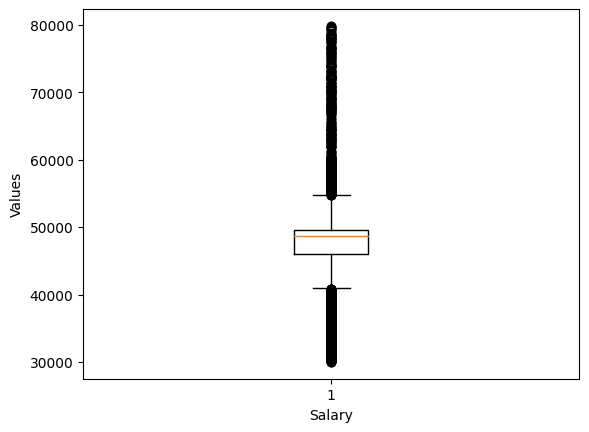

In [43]:
replace_salary_nan()
# Impute with the median of the column
df["salary"] = df["salary"].fillna(df["salary"].mean())

# show boxplot of each method 
data_mean = df["salary"]
plt.boxplot(data_mean)
# put labels on x and y
plt.xlabel("Salary")
plt.ylabel("Values")
# show the plot
plt.show()

# The orange line is the median of the column
# The box is the interquartile range (25th to 75th percentile)
# The whiskers are the minimum and maximum values
# The dots are the outliers, no outliers here

In [44]:
N = 3000
gender = np.random.choice(["Male", "Female"], N, p=[0.6, 0.4])
height = 140 + (200-140) * np.random.rand(N)
weight = 40 + (120-40) * np.random.rand(N)
salary = 30000+(80000-30000) * np.random.rand(N)
df = pd.DataFrame(data=[gender, height, weight, salary]).transpose()
df.columns = ["Gender", "Height", "weight", "salary"]
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
<ipython-input-45-d9fc3e8066be>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[sample_index] = y_pred


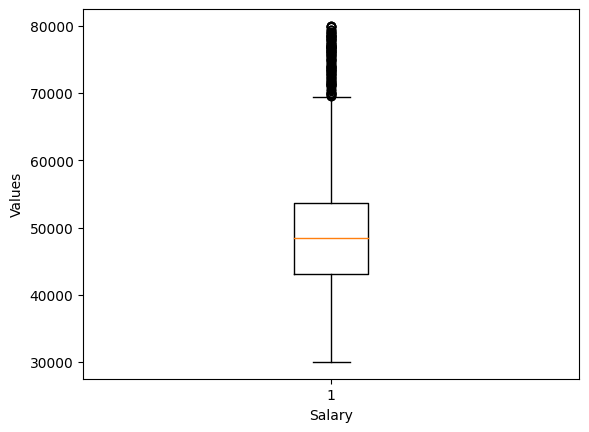

In [45]:
replace_salary_nan()
# Separate the feature matrix and the target variable
X = df.drop('salary', axis=1)
y = df['salary']

# Instantiate the Stochastic Regression Imputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
imputer = HistGradientBoostingRegressor()

# Find the indices of missing values in the salary column
missing_indices = np.where(y.isna())

# Impute missing values using Stochastic Regression Imputation
for sample_index in missing_indices:
    # Split the feature matrix into training and testing sets
    X_train = X.dropna().drop(X.iloc[sample_index].index)
    y_train = y[y.dropna().index]
    X_test = X.iloc[sample_index]
    
    # Fit the imputer to the training data
    imputer.fit(X_train, y_train)

    # Use the imputer to predict the missing value
    y_pred = imputer.predict(X_test)

    # Replace the missing value with the predicted value
    y.iloc[sample_index] = y_pred

# update the weight column with the new value of y
df["salary"] = y
# show boxplot of each method 
data_reg = df["salary"]
plt.boxplot(data_reg)
# put labels on x and y
plt.xlabel("Salary")
plt.ylabel("Values")
# show the plot
plt.show()

In [46]:
N = 3000
gender = np.random.choice(["Male", "Female"], N, p=[0.6, 0.4])
height = 140 + (200-140) * np.random.rand(N)
weight = 40 + (120-40) * np.random.rand(N)
salary = 30000+(80000-30000) * np.random.rand(N)
df = pd.DataFrame(data=[gender, height, weight, salary]).transpose()
df.columns = ["Gender", "Height", "weight", "salary"]
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

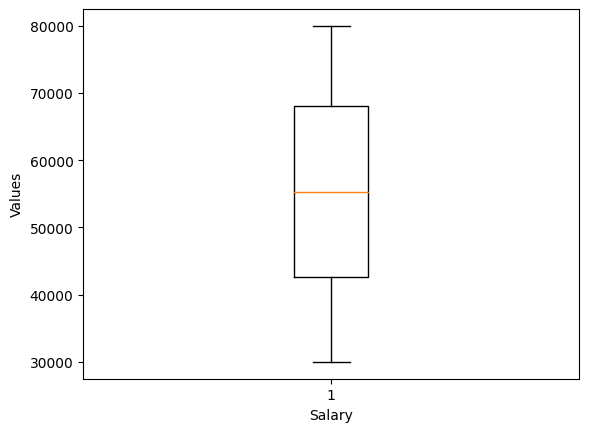

The median before hot-deck imputation 47811.240513501536
The median after hot-deck imputation 47682.63803960194


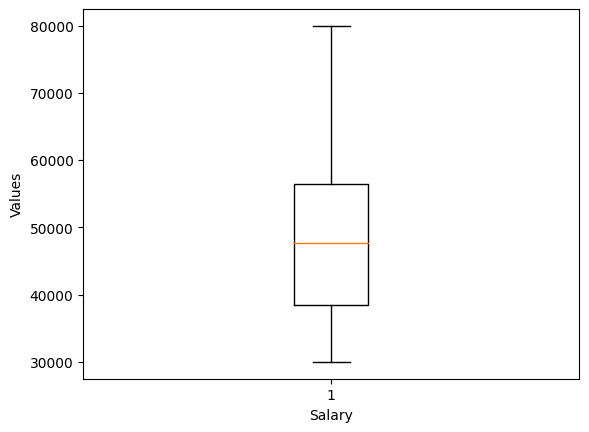

In [47]:
# Hot-deck imputation

# show boxplot of each method 
data_org = df["salary"]
plt.boxplot(data_org)
# put labels on x and y
plt.xlabel("Salary")
plt.ylabel("Values")
# show the plot
plt.show()

replace_salary_nan()

print("The median before hot-deck imputation",df["salary"].median())

# Hot deck imputation is a method that imputes missing values by randomly selecting a value from a donor record that is similar to the record with missing values. 
# Impute missing values using Hot-deck imputation
for i in range(len(df)):
    if pd.isna(df.iloc[i]['salary']):
        # Find the indices of the non-missing values in the salary column
        non_missing_indices = df[df['salary'].notna()].index
        
        # Find the index of the closest non-missing value to the missing value
        closest_index = non_missing_indices[(np.abs(non_missing_indices-i)).argmin()]
        
        # Use the value from the closest non-missing value to impute the missing value
        df.at[i, 'salary'] = df.at[closest_index, 'salary']
# print the median of the salary column
print("The median after hot-deck imputation",df["salary"].median())

# show boxplot of each method 
data_hotdeck = df["salary"]
plt.boxplot(data_hotdeck)
# put labels on x and y
plt.xlabel("Salary")
plt.ylabel("Values")
# show the plot
plt.show()

# Instantiate an IterativeImputer object with sample_posterior=True which imputes missing values using a Bayesian approach by iteratively modeling each feature with missing values as a function of other features. 
# We then use the fit_transform method of the imputer to impute the missing values in the feature matrix X.

Another way to show the boxplot

Show ranges of salary

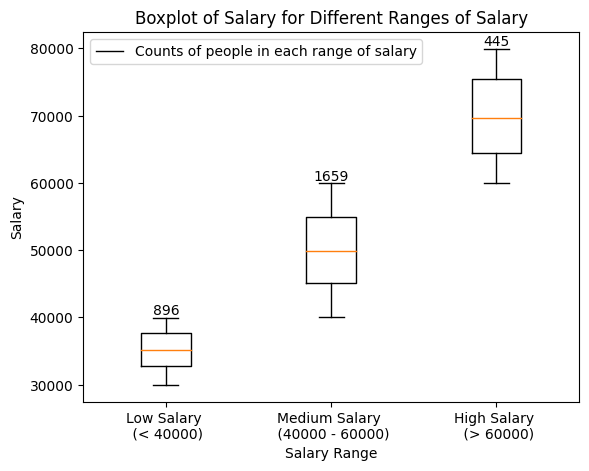

In [48]:
# Split the dataset into different ranges of salary
df_low = df[df['salary'] <= 40000]
df_medium = df[(df['salary'] > 40000) & (df['salary'] <= 60000)]
df_high = df[df['salary'] > 60000]

# Create a side-by-side boxplot of the salary column for different ranges of salary
data = [df_low['salary'], df_medium['salary'], df_high['salary']]
labels = ['Low Salary \n (< 40000)', 'Medium Salary \n (40000 - 60000)', 'High Salary \n (> 60000)']

# Create a list of counts for each range of salary
counts = [len(df_low), len(df_medium), len(df_high)]

# Create a side-by-side boxplot of the salary column for different ranges of salary
plt.boxplot(data, labels=labels)

# Add text labels for the counts on the boxplot
for i in range(len(counts)):
    plt.text(i+1, max(data[i]), str(counts[i]), ha='center', va='bottom')
# put legend that indicates that the counts of people in each range of salary
plt.legend(['Counts of people in each range of salary'])

# Set the title and axis labels
plt.title('Boxplot of Salary for Different Ranges of Salary')
plt.xlabel('Salary Range')
plt.ylabel('Salary')

# Show the plot
plt.show()

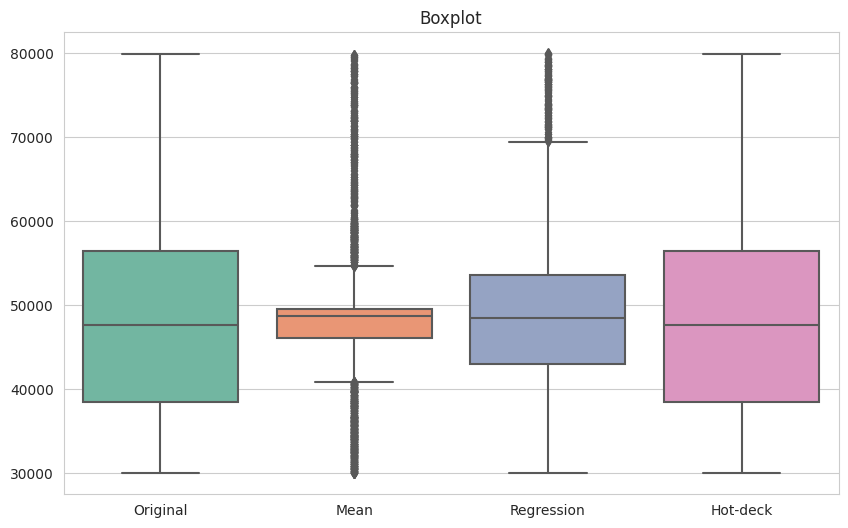

In [49]:
# plot boxplot of salary, mean imputed salary and regression imputed salary
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(data= [data_org,data_mean, data_reg, data_hotdeck], orient="v", palette="Set2")
plt.xticks([0,1,2,3], ["Original","Mean", "Regression", "Hot-deck"])
plt.title("Boxplot")
plt.show()

In [50]:
# Mean Imputation: mean is lower than mean in original, 
#   varience is very low because all the NANs are replaced with same value(mean) so no variety in values

# Regression Imputation: mean is similar to original, and it somehow keeps the varience

# Hot-deck Imputation: mean is similar and varience is also similar to original, it is the best method to impute missing values